In [1]:
import os
from collections import Counter

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import anndata
import scanpy as sc
import scipy

# Load human and mouse data

In [3]:
human_adata = anndata.read_h5ad("/home/sr2464/palmer_scratch/C2S_Files_Syed/Cross_Species_Datasets/mouse_human_pancreas_tissue_Baron_et_al/processed_data/human_pancreas_all_samples_raw_adata.h5ad")
human_adata

AnnData object with n_obs × n_vars = 8569 × 20125
    obs: 'cell_barcodes', 'cell_manual_ids', 'cell_types', 'batch_sample'
    var: 'gene_name'

In [4]:
mouse_adata = anndata.read_h5ad("/home/sr2464/palmer_scratch/C2S_Files_Syed/Cross_Species_Datasets/mouse_human_pancreas_tissue_Baron_et_al/processed_data/mouse_pancreas_all_samples_raw_adata.h5ad")
mouse_adata

AnnData object with n_obs × n_vars = 1886 × 14878
    obs: 'cell_barcodes', 'cell_manual_ids', 'cell_types', 'batch_sample'
    var: 'gene_name'

In [6]:
mouse_adata.var.tail(50)

,gene_name
ZMYM5,ZMYM5
ZMYM6,ZMYM6
ZMYND10,ZMYND10
ZMYND11,ZMYND11
ZMYND12,ZMYND12
ZMYND15,ZMYND15
ZMYND19,ZMYND19
ZMYND8,ZMYND8
ZNFX1,ZNFX1
ZNHIT1,ZNHIT1


In [4]:
sc.pp.filter_cells(human_adata, min_genes=200)
sc.pp.filter_genes(human_adata, min_cells=3)

In [5]:
human_adata

AnnData object with n_obs × n_vars = 8569 × 16359
    obs: 'cell_barcodes', 'cell_manual_ids', 'cell_types', 'batch_sample', 'n_genes'
    var: 'gene_name', 'n_cells'

In [6]:
sc.pp.filter_cells(mouse_adata, min_genes=200)
sc.pp.filter_genes(mouse_adata, min_cells=3)

In [7]:
mouse_adata

AnnData object with n_obs × n_vars = 1886 × 14466
    obs: 'cell_barcodes', 'cell_manual_ids', 'cell_types', 'batch_sample', 'n_genes'
    var: 'gene_name', 'n_cells'

In [8]:
# annotate the group of mitochondrial genes as "mt"
human_adata.var["mt"] = human_adata.var_names.str.startswith("MT-")
sc.pp.calculate_qc_metrics(
    human_adata, qc_vars=["mt"], percent_top=None, log1p=False, inplace=True
)

In [9]:
# annotate the group of mitochondrial genes as "mt"
mouse_adata.var["mt"] = mouse_adata.var_names.str.startswith("MT-")
sc.pp.calculate_qc_metrics(
    mouse_adata, qc_vars=["mt"], percent_top=None, log1p=False, inplace=True
)

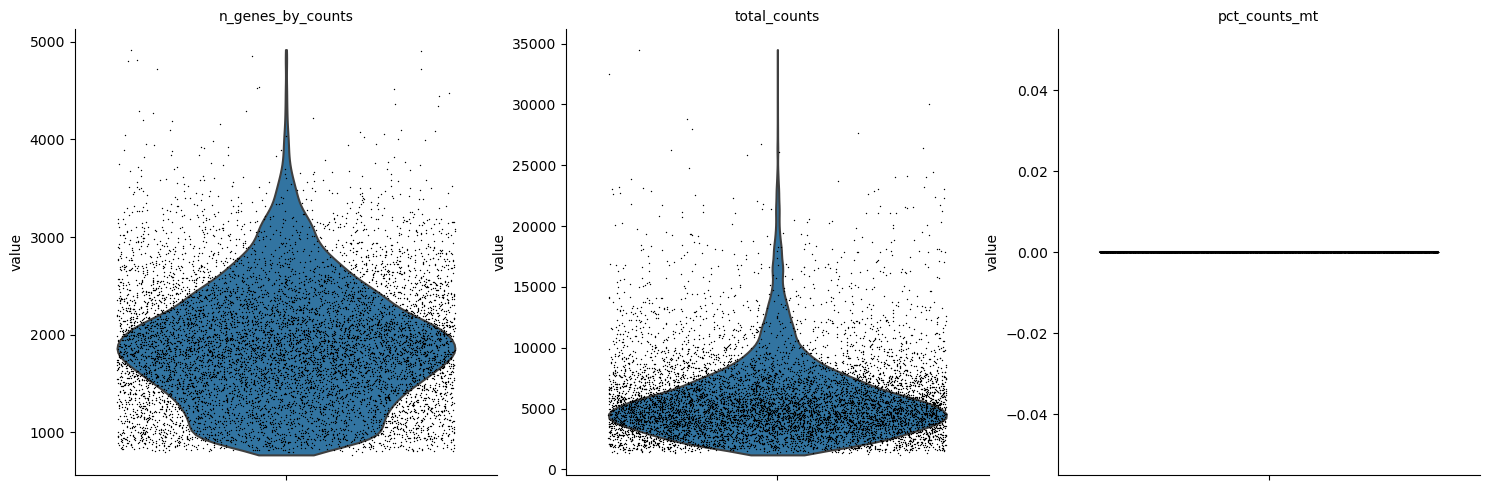

In [10]:
sc.pl.violin(
    human_adata,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt"],
    jitter=0.4,
    multi_panel=True,
)

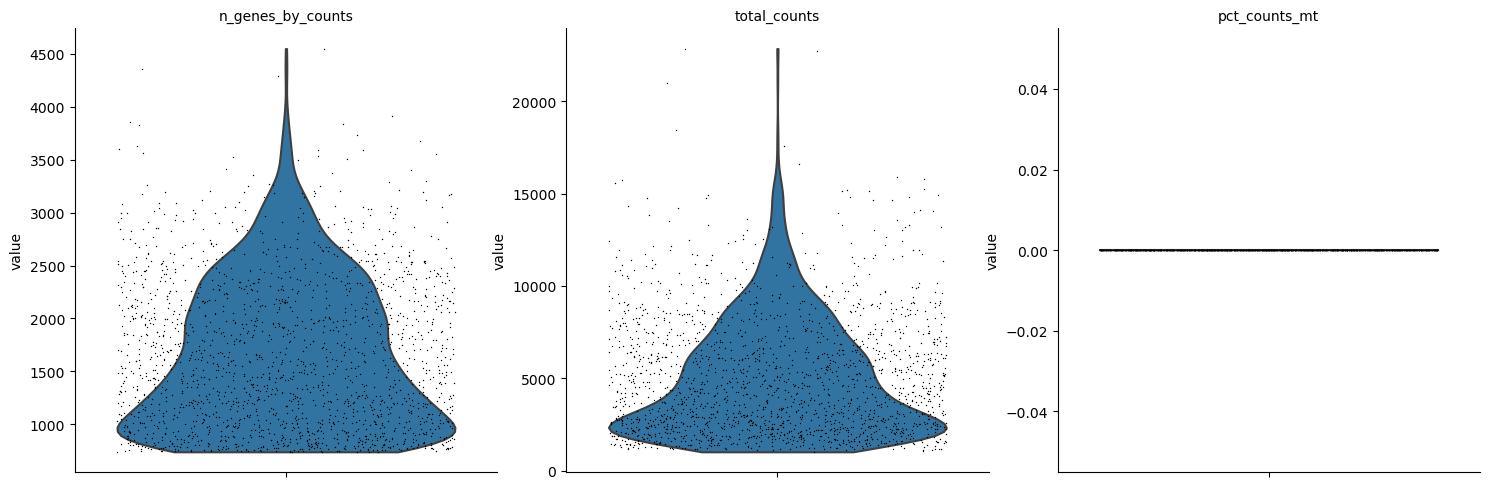

In [11]:
sc.pl.violin(
    mouse_adata,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt"],
    jitter=0.4,
    multi_panel=True,
)

In [12]:
human_adata.var.head()

,gene_name,n_cells,mt,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts
A1BG,A1BG,42,False,42,0.005135,99.509861,44.0
A1CF,A1CF,1408,False,1408,0.223947,83.568678,1919.0
A2M,A2M,273,False,273,0.054966,96.814097,471.0
A4GALT,A4GALT,444,False,444,0.071654,94.818532,614.0
AAAS,AAAS,1216,False,1216,0.187770,85.809313,1609.0


In [13]:
# Normalizing to median total counts
sc.pp.normalize_total(human_adata)
# Logarithmize the data
sc.pp.log1p(human_adata)

In [14]:
# Normalizing to median total counts
sc.pp.normalize_total(mouse_adata)
# Logarithmize the data
sc.pp.log1p(mouse_adata)

In [15]:
print(human_adata.X.data.max())
print(mouse_adata.X.data.max())

8.047143
7.580758


# Run PCA, neighbors, and UMAP

In [16]:
sc.tl.pca(human_adata)

In [17]:
sc.tl.pca(mouse_adata)

In [18]:
sc.pp.neighbors(human_adata)

/vast/palmer/home.mccleary/sr2464/.conda/envs/pyg_torch2.1/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [19]:
sc.pp.neighbors(mouse_adata)

In [20]:
sc.tl.umap(human_adata)

In [21]:
sc.tl.umap(mouse_adata)

/vast/palmer/home.mccleary/sr2464/.conda/envs/pyg_torch2.1/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


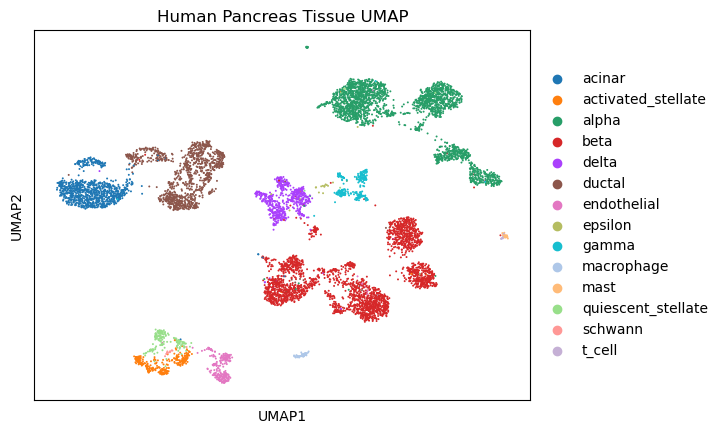

In [34]:
sc.pl.umap(
    human_adata,
    color="cell_types",
    # Setting a smaller point size to get prevent overlap
    size=8,
    title="Human Pancreas Tissue UMAP",
    show=False
)
plt.savefig("/home/sr2464/palmer_scratch/C2S_Files_Syed/Cross_Species_Datasets/mouse_human_pancreas_tissue_Baron_et_al/processed_data/human_pancreas_umap_colored_cell_types.png",
            facecolor="white", bbox_inches="tight", dpi=300)
plt.show()
plt.close()

/vast/palmer/home.mccleary/sr2464/.conda/envs/pyg_torch2.1/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


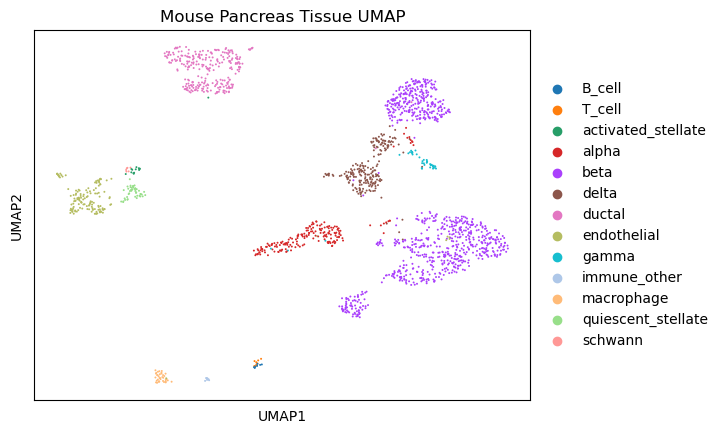

In [35]:
sc.pl.umap(
    mouse_adata,
    color="cell_types",
    # Setting a smaller point size to get prevent overlap
    size=8,
    title="Mouse Pancreas Tissue UMAP",
    show=False
)
plt.savefig("/home/sr2464/palmer_scratch/C2S_Files_Syed/Cross_Species_Datasets/mouse_human_pancreas_tissue_Baron_et_al/processed_data/mouse_pancreas_umap_colored_cell_types.png",
            facecolor="white", bbox_inches="tight", dpi=300)
plt.show()
plt.close()

In [36]:
human_adata

AnnData object with n_obs × n_vars = 8569 × 16359
    obs: 'cell_barcodes', 'cell_manual_ids', 'cell_types', 'batch_sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_name', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'log1p', 'pca', 'neighbors', 'umap', 'cell_types_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [37]:
mouse_adata

AnnData object with n_obs × n_vars = 1886 × 14466
    obs: 'cell_barcodes', 'cell_manual_ids', 'cell_types', 'batch_sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_name', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'log1p', 'pca', 'neighbors', 'umap', 'cell_types_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [38]:
human_adata.write_h5ad("/home/sr2464/palmer_scratch/C2S_Files_Syed/Cross_Species_Datasets/mouse_human_pancreas_tissue_Baron_et_al/processed_data/human_pancreas_all_samples_preprocessed_adata.h5ad")
mouse_adata.write_h5ad("/home/sr2464/palmer_scratch/C2S_Files_Syed/Cross_Species_Datasets/mouse_human_pancreas_tissue_Baron_et_al/processed_data/mouse_pancreas_all_samples_preprocessed_adata.h5ad")

# Restrict human adata to 2 samples, roughly matching mouse

In [2]:
human_adata = anndata.read_h5ad("/home/sr2464/palmer_scratch/C2S_Files_Syed/Cross_Species_Datasets/mouse_human_pancreas_tissue_Baron_et_al/processed_data/human_pancreas_all_samples_preprocessed_adata.h5ad")
mouse_adata = anndata.read_h5ad("/home/sr2464/palmer_scratch/C2S_Files_Syed/Cross_Species_Datasets/mouse_human_pancreas_tissue_Baron_et_al/processed_data/mouse_pancreas_all_samples_preprocessed_adata.h5ad")

In [3]:
human_adata

AnnData object with n_obs × n_vars = 8569 × 16359
    obs: 'cell_barcodes', 'cell_manual_ids', 'cell_types', 'batch_sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_name', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'cell_types_colors', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [4]:
Counter(human_adata.obs["batch_sample"])

Counter({'GSM2230757_human1_umifm_counts': 1937,
         'GSM2230758_human2_umifm_counts': 1724,
         'GSM2230759_human3_umifm_counts': 3605,
         'GSM2230760_human4_umifm_counts': 1303})

In [5]:
Counter(mouse_adata.obs["batch_sample"])

Counter({'GSM2230761_mouse1_umifm_counts': 822,
         'GSM2230762_mouse2_umifm_counts': 1064})

In [6]:
first_two_human_sample_bool_list = [True if batch_label in ["GSM2230757_human1_umifm_counts"] else False for batch_label in human_adata.obs["batch_sample"]]
# "GSM2230758_human2_umifm_counts"

In [7]:
len(first_two_human_sample_bool_list)

8569

In [8]:
human_adata_two_samples = human_adata[first_two_human_sample_bool_list, :].copy()
human_adata_two_samples

AnnData object with n_obs × n_vars = 1937 × 16359
    obs: 'cell_barcodes', 'cell_manual_ids', 'cell_types', 'batch_sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_name', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'cell_types_colors', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [9]:
Counter(human_adata_two_samples.obs["batch_sample"])

Counter({'GSM2230757_human1_umifm_counts': 1937})

In [10]:
human_adata_two_samples.write_h5ad("/home/sr2464/palmer_scratch/C2S_Files_Syed/Cross_Species_Datasets/mouse_human_pancreas_tissue_Baron_et_al/processed_data/human_pancreas_one_sample_preprocessed_adata.h5ad")

/home/sr2464/.conda/envs/pyg_torch2.1/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


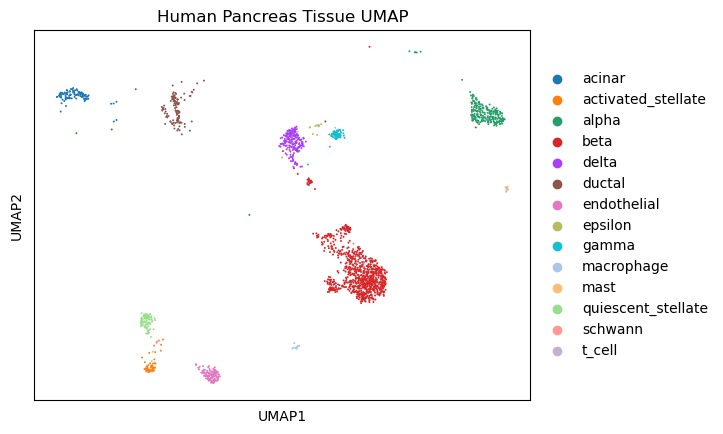

In [11]:
sc.pl.umap(
    human_adata_two_samples,
    color="cell_types",
    # Setting a smaller point size to get prevent overlap
    size=8,
    title="Human Pancreas Tissue UMAP",
    show=False
)
plt.savefig("/home/sr2464/palmer_scratch/C2S_Files_Syed/Cross_Species_Datasets/mouse_human_pancreas_tissue_Baron_et_al/processed_data/human_pancreas_one_sample_umap_colored_cell_types.png",
            facecolor="white", bbox_inches="tight", dpi=300)
plt.show()
plt.close()

# Marker gene plots

Make marker gene plots, to verify that our two mouse samples and one human samples follow expected marker genes for different cell types

In [2]:
human_adata = anndata.read_h5ad("/home/sr2464/palmer_scratch/C2S_Files_Syed/Cross_Species_Datasets/mouse_human_pancreas_tissue_Baron_et_al/processed_data/human_pancreas_one_sample_preprocessed_adata.h5ad")
mouse_adata = anndata.read_h5ad("/home/sr2464/palmer_scratch/C2S_Files_Syed/Cross_Species_Datasets/mouse_human_pancreas_tissue_Baron_et_al/processed_data/mouse_pancreas_all_samples_preprocessed_adata.h5ad")

In [3]:
human_adata

AnnData object with n_obs × n_vars = 1937 × 16359
    obs: 'cell_barcodes', 'cell_manual_ids', 'cell_types', 'batch_sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_name', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'cell_types_colors', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [4]:
mouse_adata

AnnData object with n_obs × n_vars = 1886 × 14466
    obs: 'cell_barcodes', 'cell_manual_ids', 'cell_types', 'batch_sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_name', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'cell_types_colors', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [9]:
mouse_adata.var.tail()

,gene_name,n_cells,mt,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts
ZYG11B,ZYG11B,389,False,389,0.308590,79.374337,582.0
ZYX,ZYX,277,False,277,0.224284,85.312831,423.0
ZZEF1,ZZEF1,356,False,356,0.242312,81.124072,457.0
ZZZ3,ZZZ3,342,False,342,0.268823,81.866384,507.0
L7RN6,L7RN6,223,False,223,0.173383,88.176034,327.0


In [10]:
human_marker_genes = ['GCG', 'INS', 'PPY', 'SST', 'GHRL', 'PRSS1', 'KRT19', 'SPARC', 'VWF', 'RGS5', 'PDGFRA', 'SOX10', 'SDS', 'TPSAB1', 'TRAC']
mouse_marker_genes = ['Gcg', 'Ins1', 'Ins2', 'Ppy', 'Sst', 'Krt19', 'Sparc', 'Pecam1', 'Rgs5', 'Pdgfra', 'Sox10', 'Ptprc', 'Lyz2', 'Flt3', 'Trac', 'Iglc3']
mouse_marker_genes = [gene_name.upper() for gene_name in mouse_marker_genes]

/home/sr2464/.conda/envs/pyg_torch2.1/lib/python3.8/site-packages/scanpy/plotting/_anndata.py:2414: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  obs_tidy.index.value_counts(sort=False).iteritems()


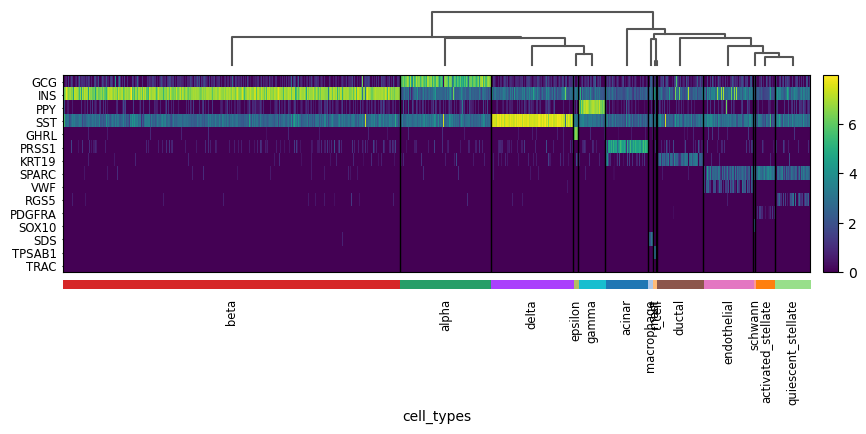

In [18]:
sc.pl.heatmap(
    human_adata, 
    human_marker_genes, 
    groupby='cell_types', 
    swap_axes=True,
    dendrogram=True,
    show=False
)
plt.savefig("/home/sr2464/palmer_scratch/C2S_Files_Syed/Cross_Species_Datasets/mouse_human_pancreas_tissue_Baron_et_al/processed_data/human_pancreas_one_sample_marker_gene_heatmap.png",
            facecolor="white", bbox_inches="tight", dpi=300)
plt.show()
plt.close()

/home/sr2464/.conda/envs/pyg_torch2.1/lib/python3.8/site-packages/scanpy/plotting/_anndata.py:2414: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  obs_tidy.index.value_counts(sort=False).iteritems()


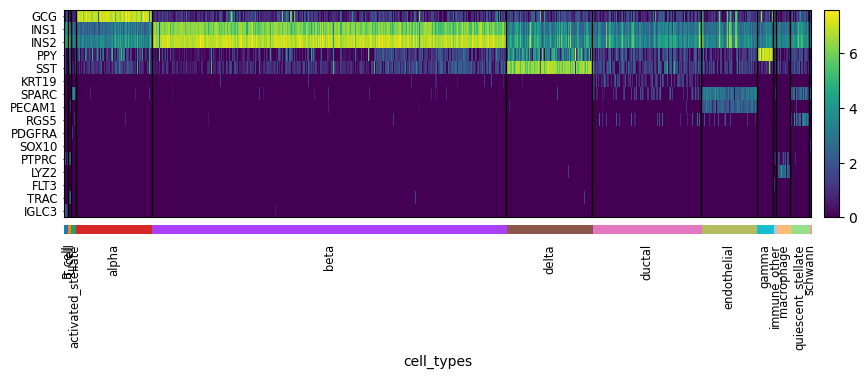

In [20]:
sc.pl.heatmap(
    mouse_adata, 
    mouse_marker_genes, 
    groupby='cell_types', 
    swap_axes=True,
    # dendrogram=True,
    show=False
)
plt.savefig("/home/sr2464/palmer_scratch/C2S_Files_Syed/Cross_Species_Datasets/mouse_human_pancreas_tissue_Baron_et_al/processed_data/mouse_pancreas_marker_gene_heatmap.png",
            facecolor="white", bbox_inches="tight", dpi=300)
plt.show()
plt.close()